In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['embeddings', 'train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
data = pd.read_csv('../input/train.csv')
data.shape

(1306122, 3)

In [3]:
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
data.dtypes

qid              object
question_text    object
target            int64
dtype: object

In [5]:
test = pd.read_csv('../input/test.csv')
sample = pd.read_csv ('../input/sample_submission.csv')

In [6]:
test.shape

(56370, 2)

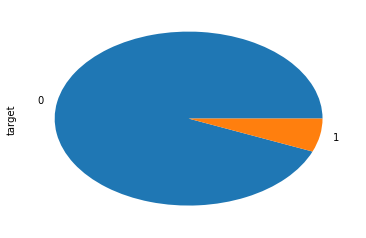

In [7]:
data['target'].value_counts().plot.pie()

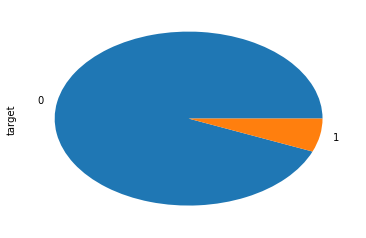

In [8]:
data['target'].value_counts().plot(kind = 'pie')

In [9]:
data['target'].value_counts()/data.shape[0]*100

0    93.812982
1     6.187018
Name: target, dtype: float64

## TEXT CLEANING

In [10]:
import nltk
import wordcloud
import matplotlib.pyplot as plt

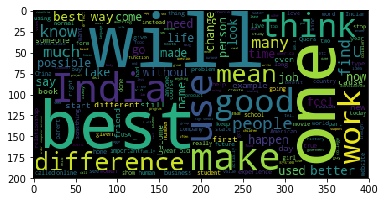

In [11]:
class_0 = data[data['target'] == 0]
class_1 = data[data['target'] == 1]
wc = wordcloud.WordCloud().generate(' '.join(class_0['question_text']))
plt.imshow(wc)

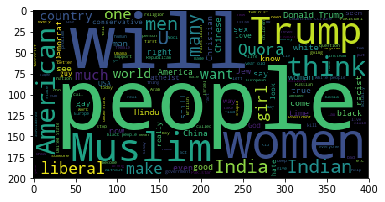

In [12]:
wc = wordcloud.WordCloud().generate(' '.join(class_1['question_text']))
plt.imshow(wc)

In [13]:
docs = data['question_text'].str.lower()
docs.head()

0    how did quebec nationalists see their province...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [14]:
docs.str.replace('the','-').head()  #Replace 'the' with '-'


0    how did quebec nationalists see -ir province a...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used - magdeburg hem...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [15]:
docs.str.replace('rt','').head()  #Remove rt

0    how did quebec nationalists see their province...
1    do you have an adopted dog, how would you enco...
2    why does velocity affect time? does velocity a...
3    how did otto von guericke used the magdeburg h...
4    can i conve montra helicon d to a mountain bik...
Name: question_text, dtype: object

In [16]:
docs.str.replace('[a-z]','').head()   #Remove all alphabets

0                1960?
1         ,          ?
2              ?     ?
3                    ?
4                    ?
Name: question_text, dtype: object

In [17]:
docs.str.replace('[^a-z ]','').head() 

0    how did quebec nationalists see their province...
1    do you have an adopted dog how would you encou...
2    why does velocity affect time does velocity af...
3    how did otto von guericke used the magdeburg h...
4    can i convert montra helicon d to a mountain b...
Name: question_text, dtype: object

In [19]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
len(stop_words)

179

In [23]:
stemmer = nltk.PorterStemmer()

In [24]:
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)
    
docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

0         quebec nationalist see provinc nation 1960s?
1          adopt dog, would encourag peopl adopt shop?
2      veloc affect time? veloc affect space geometry?
3          otto von guerick use magdeburg hemispheres?
4    convert montra helicon mountain bike chang tyres?
Name: question_text, dtype: object

([], <a list of 0 Text yticklabel objects>)

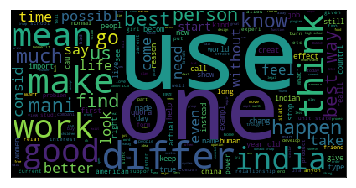

In [25]:
from wordcloud import WordCloud
wc = WordCloud().generate(' '.join(docs_clean))  #Word count of cleaned data(docs_clean)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])

In [37]:
from sklearn.model_selection import train_test_split

train,validate = train_test_split(docs_clean,test_size = 0.3,random_state = 100)
train_y = data.loc[train.index]['target']
validate_y = data.loc[validate.index]['target']

#train_y = train['target']
#validate_y = validate['target']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer        


In [39]:
cv = CountVectorizer()
cv.fit(train) 
train_x_sparse = cv.transform(train)
validate_x_sparse = cv.transform(validate)


In [40]:
train_x_sparse

<914285x156479 sparse matrix of type '<class 'numpy.int64'>'
	with 5875498 stored elements in Compressed Sparse Row format>

In [41]:
validate_x_sparse

<391837x156479 sparse matrix of type '<class 'numpy.int64'>'
	with 2481896 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(max_depth = 20,random_state = 100)
dt_model.fit(train_x_sparse,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [50]:
pred_class= dt_model.predict(validate_x_sparse)
pred_prob = pd.DataFrame(dt_model.predict_proba(validate_x_sparse),columns = ['Sincere','insincere'])

In [51]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc

0.944165558637903
0.34094469213158207


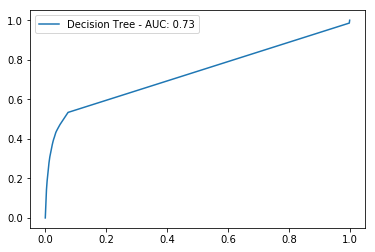

In [59]:
print(accuracy_score(validate_y,pred_class))
print(f1_score(validate_y,pred_class))
fpr,tpr,thresholds = roc_curve(validate_y,pred_prob['insincere'])
auc_dt = auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.legend(['Decision Tree - AUC: %.2f'%auc_dt])

In [64]:
test =pd.read_csv('../input/test.csv')
test_docs = test['question_text'].fillna('').str.lower()
test_docs = test_docs.str.replace('[^a-z]','')

def clean_text(text):
    temp = ' '.join([stemmer.stem(word) for word in text.split(' ') \
                 if word not in stop_words])
    return temp
test_docs_clean  = test_docs.apply(lambda v: clean_text(v))
test_docs_clean.shape

(56370,)

In [66]:
test_x = cv.transform(test_docs_clean)
test_pred_class = dt_model.predict(test_x)
test_pred_class.shape

(56370,)

In [69]:
submission = pd.DataFrame({'qid':test['qid'],
                          'prediction':test_pred_class})
submission.to_csv('submission.csv',index = False)
submission.head()

,qid,prediction
0,00014894849d00ba98a9,0
1,000156468431f09b3cae,0
2,000227734433360e1aae,0
3,0005e06fbe3045bd2a92,0
4,00068a0f7f41f50fc399,0
